<a href="https://colab.research.google.com/github/Muhirwakyeyune/GDA_Live_coding_FML23/blob/class/Logisticregressuion34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

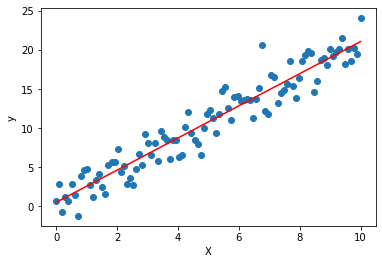

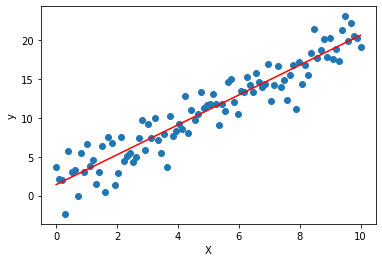

In [25]:
x

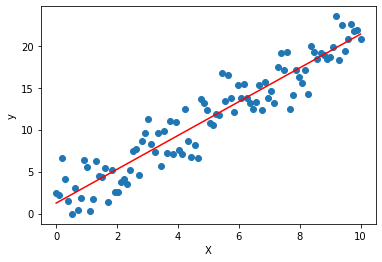

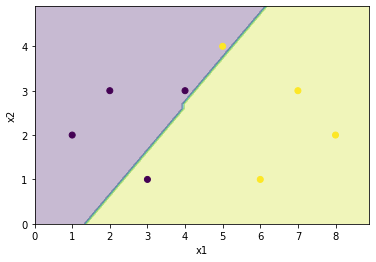

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Update weights and bias iteratively until convergence
        for _ in range(self.n_iterations):
            linear_output = np.dot(X, self.weights) + self.bias
            predicted_output = self.sigmoid_function(linear_output)
            error = y - predicted_output
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)
            self.weights += self.learning_rate * dw
            self.bias += self.learning_rate * db
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predicted_output = self.sigmoid_function(linear_output)
        predicted_output = np.where(predicted_output >= 0.5, 1, 0)
        return predicted_output
    
    def sigmoid_function(self, x):
        return 1 / (1 + np.exp(-x))
    
    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()
# Create some toy data
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 4], [6, 1], [7, 3], [8, 2]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Plot the decision boundary
logreg.plot_decision_boundary(X, y)
